# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [11]:
import numpy as np
import pandas as pd

In [4]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  2445k      0  0:00:37  0:00:37 --:--:-- 2740k
total 88
-rw-r--r-- 1 thomas thomas 21493 Jun 30 09:10 image_denoising.ipynb
drwx------ 2 thomas thomas 57344 Jun  9 15:06 paintings
-rw-r--r-- 1 thomas thomas     0 Jun 29 09:13 README.md
drwxr-xr-x 2 thomas thomas  4096 Jun 29 09:13 tests


In [8]:
import glob

dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Kazimir_Malevich_13.jpg',
 './paintings/Jan_van_Eyck_15.jpg',
 './paintings/Albrecht_Duâ\x95\xa0Ãªrer_34.jpg',
 './paintings/Edgar_Degas_271.jpg',
 './paintings/Titian_45.jpg',
 './paintings/Paul_Gauguin_65.jpg',
 './paintings/Andy_Warhol_89.jpg',
 './paintings/Pierre-Auguste_Renoir_151.jpg',
 './paintings/Pablo_Picasso_120.jpg',
 './paintings/Vincent_van_Gogh_305.jpg',
 './paintings/Pablo_Picasso_186.jpg',
 './paintings/Pablo_Picasso_63.jpg',
 './paintings/Albrecht_DuÌ\x88rer_244.jpg',
 './paintings/Frida_Kahlo_87.jpg',
 './paintings/Vincent_van_Gogh_558.jpg',
 './paintings/Pablo_Picasso_14.jpg',
 './paintings/Rene_Magritte_94.jpg',
 './paintings/El_Greco_63.jpg',
 './paintings/Gustav_Klimt_104.jpg',
 './paintings/Paul_Gauguin_12.jpg',
 './paintings/Vasiliy_Kandinskiy_57.jpg',
 './paintings/Edgar_Degas_228.jpg',
 './paintings/Marc_Chagall_101.jpg',
 './paintings/Pierre-Auguste_Renoir_57.jpg',
 './paintings/Leonardo_da_Vinci_50.jpg',
 './paintings/Rene_Magritte_50.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

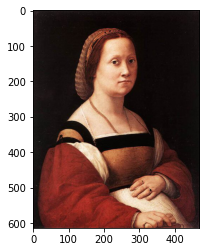

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

image = Image.open(dataset_paths[53])
plt.imshow(image)
plt.show()

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [12]:
img_shape = np.array(image).shape

print(f'The shape of the image is: {img_shape}')

img_dim = len(img_shape)

print(f'This is an image of dimension: {img_dim}')

The shape of the image is: (614, 469, 3)
This is an image of dimension: 3


❓ **What was in the image above?**

In [13]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [14]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [15]:
dataset_images = []

for img_path in dataset_paths:
    image = Image.open(img_path)
    dataset_images.append(np.array(image))
    
assert len(dataset_images) == len(dataset_paths)

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [16]:
dataset_images_dim = []
for img in dataset_images:
    dataset_images_dim.append(len(img.shape)) 

temp_img_dim_df = pd.DataFrame(np.array(dataset_images_dim))
print(f'We can see that there are {temp_img_dim_df.nunique()[0]} differents dimensions for the images in the dataset')

print(f'We have:')
for key,value in temp_img_dim_df.value_counts().items():
    print(f'{value} images of dimensions {key[0]}')

print(f'In fact images of dimension 2 are black & white images whereas images of dimension 3 are 3-colored images')

We can see that there are 2 differents dimensions for the images in the dataset
We have:
1013 images of dimensions 3
72 images of dimensions 2
In fact images of dimension 2 are black & white images whereas images of dimension 3 are 3-colored images


👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [17]:
from tqdm import tqdm

dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 1969.00it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [18]:
import tensorflow as tf

dataset_resized = []

for img in dataset_images:
    dataset_resized.append(tf.image.resize(img, [120,100]))

print(f'The shape of the new dataset is {np.array(dataset_resized).shape}. It\'s all good !')

The shape of the new dataset is (1085, 120, 100, 3). It's all good !


❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [19]:
dataset_scaled = np.array([])

dataset_scaled = np.array(dataset_resized) / 255

dataset_scaled[0]

array([[[0.6169412 , 0.62478435, 0.5306667 ],
        [0.67298037, 0.6915882 , 0.60139215],
        [0.4004902 , 0.43411765, 0.36078432],
        ...,
        [0.305294  , 0.3546078 , 0.39490178],
        [0.25221592, 0.30611786, 0.36009833],
        [0.3073928 , 0.3698046 , 0.43354958]],

       [[0.50990194, 0.5445294 , 0.47035295],
        [0.43598038, 0.47711766, 0.410451  ],
        [0.31882355, 0.367549  , 0.30764705],
        ...,
        [0.26843166, 0.31941205, 0.35470617],
        [0.23913717, 0.286196  , 0.3332548 ],
        [0.25756836, 0.29678404, 0.34384286]],

       [[0.41576472, 0.4775098 , 0.43470588],
        [0.29266667, 0.3554118 , 0.31619608],
        [0.25078434, 0.3242157 , 0.29058826],
        ...,
        [0.22725615, 0.2804915 , 0.31578562],
        [0.33196136, 0.37017703, 0.40547115],
        [0.48837352, 0.5043931 , 0.5386873 ]],

       ...,

       [[0.9684706 , 0.8890392 , 0.75211763],
        [0.86866665, 0.8303725 , 0.6647451 ],
        [0.9322549 , 0

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [20]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

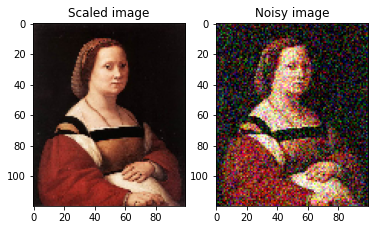

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(dataset_scaled[53])
ax1.title.set_text('Scaled image')

ax2.imshow(dataset_noisy[53])
ax2.title.set_text('Noisy image')

fig.show()

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [22]:
from sklearn.model_selection import train_test_split

X = dataset_noisy
Y = dataset_scaled

X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [3]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [4]:
encoder = Sequential(name='encoder') 
encoder.add(layers.Conv2D(16, (4,4), input_shape=(120, 100, 3), padding='same'))
encoder.add(layers.MaxPool2D(pool_size=(2,2)))
encoder.add(layers.Conv2D(8, (3,3), padding='same'))
encoder.add(layers.MaxPool2D(pool_size=(2,2)))
encoder.add(layers.Flatten())
encoder.add(layers.Dense(6000, activation='sigmoid'))
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 120, 100, 16)      784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 50, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 25, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6000)              0         
_________________________________________________________________
dense (Dense)                (None, 6000)              36006000  
Total params: 36,007,944
Trainable params: 36,007,944
Non-trainable params: 0
_______________________________________________

👉 **Test your encoder below**

In [5]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              36007944  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 36,014,619
Trainable params: 36,014,619
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [33]:
score_baseline = np.cumsum(Y_test) / len(Y_test)

print(f'The baseline mean aboslute error computed is of {score_test:.3f}%')

The baseline mean aboslute error computed is of 23.571%


❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

# optimizer
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

# loss
loss = tf.keras.losses.MeanSquaredError()

# metrics
mae = tf.keras.metrics.MeanAbsoluteError()

# compile model
autoencoder.compile(loss=loss,
        optimizer=opt,
        metrics=[mae])

es = EarlyStopping(patience=5, restore_best_weights=True)

history = autoencoder.fit(X_train, Y_train, 
          batch_size = 16,
          epochs=50,
          validation_split=0.3,
          callbacks=[es]
         )

Epoch 1/50
38/38 [==============================] - 11s 275ms/step - loss: 0.0782 - mean_absolute_error: 0.2430 - val_loss: 0.0824 - val_mean_absolute_error: 0.2505
Epoch 2/50
38/38 [==============================] - 10s 261ms/step - loss: 0.0757 - mean_absolute_error: 0.2390 - val_loss: 0.0806 - val_mean_absolute_error: 0.2474
Epoch 3/50
38/38 [==============================] - 10s 271ms/step - loss: 0.0742 - mean_absolute_error: 0.2363 - val_loss: 0.0794 - val_mean_absolute_error: 0.2452
Epoch 4/50
38/38 [==============================] - 10s 269ms/step - loss: 0.0732 - mean_absolute_error: 0.2344 - val_loss: 0.0788 - val_mean_absolute_error: 0.2436
Epoch 5/50
38/38 [==============================] - 10s 269ms/step - loss: 0.0726 - mean_absolute_error: 0.2330 - val_loss: 0.0784 - val_mean_absolute_error: 0.2425
Epoch 6/50
38/38 [==============================] - 10s 269ms/step - loss: 0.0723 - mean_absolute_error: 0.2321 - val_loss: 0.0781 - val_mean_absolute_error: 0.2417
Epoch 7/50

38/38 [==============================] - 10s 271ms/step - loss: 0.0717 - mean_absolute_error: 0.2300 - val_loss: 0.0779 - val_mean_absolute_error: 0.2397


❓ **Plot your training and validation loss at each epoch using the cell below**

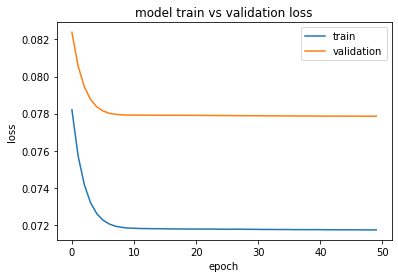

<Figure size 432x288 with 0 Axes>

In [25]:
# Plot below your train/val loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [32]:
Y_pred = autoencoder.predict(X_test)

res = autoencoder.evaluate(X_test, Y_test, verbose=0)

score_test = res[1]*100

print(f'The mean aboslute error evaluated on the test set is of {score_test:.3f}%')

The mean aboslute error evaluated on the test set is of 23.571%


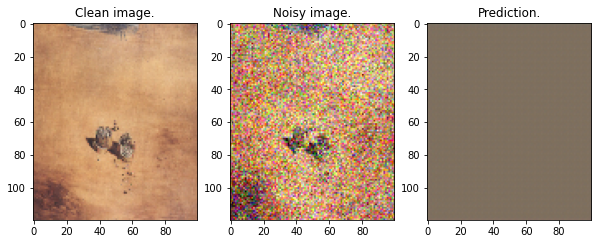

In [30]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [31]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()

NameError: name 'score_baseline' is not defined